# Who is the most important character in Game Of Thrones?


If you haven't heard of Game of Thrones, then you must be really good at hiding. Game of Thrones is the hugely popular television series by HBO based on the (also) hugely popular book series A Song of Ice and Fire by George R.R. Martin. In this notebook, I will analyze the co-occurrence network of the characters in the Game of Thrones books in order to find out the most important character in the series.

## 1. Methodology & Dataset

We will use 3 different metrics to measure the importance of each character from all 5 books: degree centrality, betweenness centrality, and page rank. We will use Python's <code>networkx</code>, a network analysis library. We will also need pandas (one of the core Python's libraries) The dataset, consisting of 5 .csv files, is provided by DataCamp (if you need the dataset, go to my GitHub). Here is how the original data looks like:

In [76]:
# Importing modules
import pandas as pd
# Reading in datasets/book1.csv
book1 = pd.read_csv("datasets/book1.csv")
# Printing out the head of the dataset
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


## 2. Create The Network Of Characters

Source and target are the two nodes that are linked by an edge. A network can have directed or undirected edges and in this network all the edges are undirected. The weight attribute of every edge tells us the number of interactions that the characters have had over the book.

**Step 1: Load the data as a pandas DataFrame**

In [77]:
book1 = pd.read_csv("datasets/book1.csv")   #we will load the data for the other 4 books below

**Step 2: Create a network of characters using a graph object**

In [78]:
import networkx as nx
# Creating an empty graph object
G_book1 = nx.Graph()

**Step 3: Populate the network**

In [79]:
# Iterating through the DataFrame to add edges
for _, edge in book1.iterrows():
    G_book1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
# Creating a list of networks for all the books
books = [G_book1]
book_fnames = ['datasets/book2.csv', 'datasets/book3.csv', 'datasets/book4.csv', 'datasets/book5.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    books.append(G_book)

**Step 4: We now have a network of characters that looks like this**

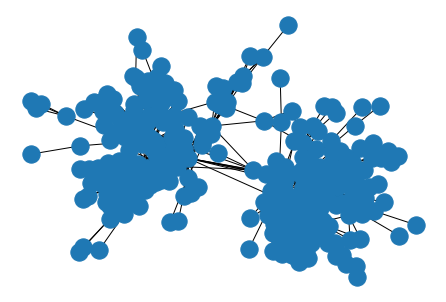

In [80]:
nx.draw(G_book)   # Note: we don't need fancy visualizations, this is just an example. 
                  # We will answer the main question mainly 'mathematically'

## 3. Analyse The Network Using Degree Centrality

In simple words, degree centrality is one of ways to measure how much important a node in the network (a GOT character) is. It measures the number of neighbors of a node in the network. A node's degree is simply a count of how many social connections (i.e., edges) it has. The degree centrality for a node is simply its degree. A node with 10 social connections would have a degree centrality of 10.

In [81]:
# Calculating the degree centrality of book 1-5
deg_cen_book1 = nx.degree_centrality(books[0])
deg_cen_book2 = nx.degree_centrality(books[1])
deg_cen_book3 = nx.degree_centrality(books[2])
deg_cen_book4 = nx.degree_centrality(books[3])
deg_cen_book5 = nx.degree_centrality(books[4])
# Sorting the dictionaries according to their degree centrality and storing the top 10
sorted_deg_cen_book1 = sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_deg_cen_book2 = sorted(deg_cen_book2.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_deg_cen_book3 = sorted(deg_cen_book3.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_deg_cen_book4 = sorted(deg_cen_book4.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_deg_cen_book5 = sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse = True)[0:10]

#iterate thought the results (dictionaries) to make one aggregate list of all books
top_characters_all_books = {}
listoflists = [sorted_deg_cen_book1,sorted_deg_cen_book2,sorted_deg_cen_book3,sorted_deg_cen_book4,sorted_deg_cen_book5]

for book in listoflists :
    for character,value in book :
        if character in top_characters_all_books :
            top_characters_all_books[character] += value
        else :
            top_characters_all_books[character] = value
            
top_five_degree_centrality = sorted(top_characters_all_books.items(), key=lambda x:x[1], reverse = True)[0:10]
print("\n")
print("TOP 5 characters in ALL BOOKS (acc. Degree Centrality)")
print(top_five_degree_centrality[0:5])



TOP 5 characters in ALL BOOKS (acc. Degree Centrality)
[('Tyrion-Lannister', 0.8477708979416633), ('Cersei-Lannister', 0.7621726185337769), ('Jon-Snow', 0.5673126932919415), ('Joffrey-Baratheon', 0.5090237791235889), ('Robb-Stark', 0.48608261336857395)]


## The most important GoT character accoding to degree centrality:

                                                      Tyrion Lannister

## 4. Analyse The Network Using Betweenness Centrality

In simple words, betweenness centrality measures to what extend a particular node holds the network together. It captures how much a given node is in-between others. Betweenness centrality measures how important a node is to the shortest paths through the network. It is a widely used measure that captures a person's role in allowing information to pass from one part of the network to the other. I believe these nodes are called *articulation points* (if you take them out the graph becomes disconnected)

In [82]:
# Calculating the betweenness centrality of book 1-5
bet_cen_book1 = nx.betweenness_centrality(books[0])
bet_cen_book2 = nx.betweenness_centrality(books[1])
bet_cen_book3 = nx.betweenness_centrality(books[2])
bet_cen_book4 = nx.betweenness_centrality(books[3])
bet_cen_book5 = nx.betweenness_centrality(books[4])
# Sorting the dictionaries according to their betweenness centrality and storing the top 10
sorted_bet_cen_book1 = sorted(bet_cen_book1.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_bet_cen_book2 = sorted(bet_cen_book2.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_bet_cen_book3 = sorted(bet_cen_book3.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_bet_cen_book4 = sorted(bet_cen_book4.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_bet_cen_book5 = sorted(bet_cen_book5.items(), key=lambda x:x[1], reverse = True)[0:10]

#iterate thought the results (dictionaries) to make one aggregate list of all books
top_characters_all_books2 = {}
listoflists2 = [sorted_bet_cen_book1,sorted_bet_cen_book2,sorted_bet_cen_book3,sorted_bet_cen_book4,sorted_bet_cen_book5]

for book in listoflists2 :
    for character,value in book :
        if character in top_characters_all_books2 :
            top_characters_all_books2[character] += value
        else :
            top_characters_all_books2[character] = value
            
top_five_betweenness_centrality = sorted(top_characters_all_books2.items(), key=lambda x:x[1], reverse = True)[0:10]
print("\n")
print("TOP 5 characters in ALL BOOKS (acc. Betweenness Centrality)")
print(top_five_betweenness_centrality[0:5])



TOP 5 characters in ALL BOOKS (acc. Betweenness Centrality)
[('Stannis-Baratheon', 0.9576674315458988), ('Jon-Snow', 0.8146984707686813), ('Tyrion-Lannister', 0.8004024251365659), ('Robert-Baratheon', 0.7113784137288915), ('Daenerys-Targaryen', 0.5187069305121602)]


## The most important GoT character accoding to betweenness centrality:

                                                   Stannis Baratheon

## 5. Analyse The Network Using Page Rank

PageRank was the initial way Google ranked web pages. It evaluates the inlinks and outlinks of webpages in the world wide web, which is, essentially, a directed network. PageRank works by counting the number and quality of links to a node to determine a rough estimate of how important the node is.

In [83]:
# Calculating the page rank of book 1-5
page_rank_book1 = nx.pagerank(books[0])
page_rank_book2 = nx.pagerank(books[1])
page_rank_book3 = nx.pagerank(books[2])
page_rank_book4 = nx.pagerank(books[3])
page_rank_book5 = nx.pagerank(books[4])
# Sorting the dictionaries according to their page rank and storing the top 10
sorted_page_rank_book1 = sorted(page_rank_book1.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_page_rank_book2 = sorted(page_rank_book2.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_page_rank_book3 = sorted(page_rank_book3.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_page_rank_book4 = sorted(page_rank_book4.items(), key=lambda x:x[1], reverse = True)[0:10]
sorted_page_rank_book5 = sorted(page_rank_book5.items(), key=lambda x:x[1], reverse = True)[0:10]

#iterate thought the results (dictionaries) to make one aggregate list of all books
top_characters_all_books3 = {}
listoflists3 = [sorted_page_rank_book1,sorted_page_rank_book2,sorted_page_rank_book3,sorted_page_rank_book4,sorted_page_rank_book5]

for book in listoflists3 :
    for character,value in book :
        if character in top_characters_all_books3 :
            top_characters_all_books3[character] += value
        else :
            top_characters_all_books3[character] = value
            
top_five_page_rank = sorted(top_characters_all_books3.items(), key=lambda x:x[1], reverse = True)[0:10]
print("\n")
print("TOP 5 characters in ALL BOOKS (acc. Page Rank)")
print(top_five_page_rank[0:5])



TOP 5 characters in ALL BOOKS (acc. Page Rank)
[('Jon-Snow', 0.17363512919514706), ('Tyrion-Lannister', 0.1558212241830548), ('Cersei-Lannister', 0.12229731632055638), ('Daenerys-Targaryen', 0.09390839025780304), ('Robb-Stark', 0.08027095246553692)]


## The most important GoT character accoding to pagerank:

                                                       Jon Snow

**Dataset & project skeleton is provided by DataCamp.**

**Author: Stanislav Lukashevich**

Find the original dataset here: https://github.com/StanislavLukashevich/GoT_NetworkAnalysis